In [1]:
import seaborn as sns

In [2]:
iris = sns.load_dataset('iris')

In [3]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


#### 전제조건 : 데이터가 올바른 데이터야한다.

## 데이터 검증 이슈

#### 데이터 검증을 누가 하겠어? 사람이. 아직까지는.

##### EDA 를 통해서 검증할수있다!
데이터가 항상 올바르다는 가정을 하고 해야해. 
최소한의 검증을 해보는게 EDA 단계이다.

### iris 종류를 분류하는 모델을 만드는게 목표.
그러기위해서는 iris 종류가 필요하다.
정답값, y값, 타겟값, 목표값이라고 한다. 
목표값이 있는 머신러닝 종류가 supervised learning 이다. 
목표값과 이 데이터간의 관련성이 있어야한다. 

근데, 관련있는지 없는지 알려면,,,, 모델을 만들어봐야 안다. ... .아놔.

EDA
1. graphinc or non graphic
2. 컬럼 관련 여부

전문가에게 어느 특성(컬럼)이 가장 중요한가요? 물어보고 그를 중심으로 데이터를 수집하면 됨...?

메타 방법은 어떤 데이터에도 적용이 다 되는 방법이다. 

### KNN 방법
중요한거 아니라고 하심. 잠시 개념 익히기 위해서 봄.

나랑 가까운게 뭐인지 찾고 난 후, 가까운애의 다수결인 애들이 누군지에 분류되는 방법. k=1 일때, 3일때, 5일때 (짝수는 비길수 있으니 안함)

## Model Selection
머신러닝 그 중 supervised learning 에서도 knn외에도 많은 방법이 있다.
데이터마다 가정이 다 다르다. 그러니, 방법도 다 다르다. 
내 과정에 맞게 다양한 알고리즘을 써서 그 중 성능이 제일 좋은걸 선택하는게 model selection 이다. 
딥러닝, knn, linear 등 후보가 이렇다.
어떤 애가 성능이 젤 좋은지는 알 수 없다. 
데이터마다 다 다르니까.. 
그래서 무조건 여러개 시도해봐야한다.
한마디로 시행착오가 필요한거. 그러려면 돈이 필요한거다. 그래서, 경험이 많이 필요하다... 학위도 중요하고... 

In [4]:
#엄청나게 많은 알고리즘 중에서 선택해보겠다.
from sklearn.neighbors import KNeighborsClassifier

In [5]:
#클래스를 인스턴스화 하기
#이 때 전략을 짜야해. 나랑 가까운 애 몇개를 기준으로 볼건지. 
knn = KNeighborsClassifier(n_neighbors=3)

In [7]:
knn.fit(iris.iloc[:,:-1], iris.species)
# x 데이터 : iris.iloc[:,:-1]
# 타겟데이터 : iris.species
# 이렇게 모델 만들어주세요.

KNeighborsClassifier(n_neighbors=3)

In [9]:
#예측하기
knn.predict([[3,3,3,3,]])

C:\Users\user\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array(['versicolor'], dtype=object)

In [10]:
#예측 문제를 풀 때, 사람의 지식만으로 풀거나, 데이터만으로 풀거나 
#딥러닝은 컬럼이 많고, 데이터가 아주 많아야 성능값을 할 수 있다. iris 데이터 같이 적은 데이터는 성능이 더 안좋기만하다. 


# 실전

In [13]:
#1. pandas 로 갖고온 데이터를 젤 처음해야할 건. Tidy Data 인지 확인부터하라.
iris.info()
#데이터 몇 개있는지, 많은지 적은지 알아야한다.
#컬럼 몇 개있는지. (컬럼 너무 많으면, 차원의 저주에 걸릴 수 있다)
#미리 문제가 생길 가능성을 체크하라. 
#Dtype 도 확인하기
#데이터가 150개 다 채워져있는지. 아닌지. 
#사이킷런의 특수기능으로 숫자로 굳이 안바꿔줘도 되는 점이 있다.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [16]:
#이제는 품질 좋은지 확인하는 방법? 
# 도메인 지식 있으면, 알수 있지만, 
# 도메인 지식 없으면, 통계를 통해서 알 수 있다.
# 통계를 통해 보자
iris.describe()
#가장 기본적인 통계값이다. 각각 컬럼에 대해서 평균, 표준편차 , 최대 최소 
#이걸 한눈에 보는게 box plot

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


<Axes: >

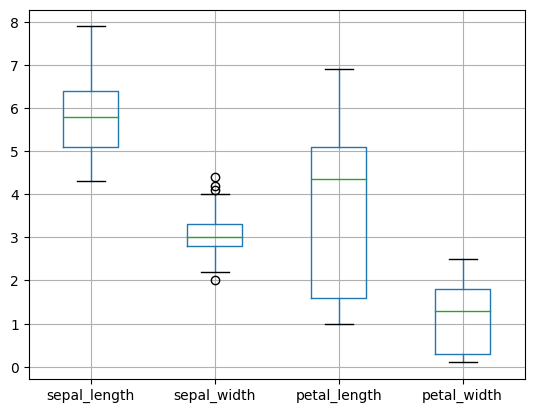

In [17]:
#box plot 그려보기
iris.boxplot()
#하나의 컬럼에 대한 통계값.

#그래프 그리는것도 중요하고, 해석하는건 엄청 중요하다. 

#편차가 크면, 평균에 몰려있는게 아니라 골고루 분포됐다는 거다. 

#통계값이 잘못되있다고 포기하지말고, 통계값도 어느 기준으로 만든 값이기에... 다시 처음으로 돌아가서 수정하면 된다... 

In [27]:
#seaborn 통해 인사이트 볼거임.
import pandas as pd
import seaborn as sns
iris = sns.load_dataset('iris')
sns.pairplot(iris, hue='species')

C:\Users\user\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\user\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\user\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\user\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. 

In [20]:
iris.iloc[:,:-1].skew()

sepal_length    0.314911
sepal_width     0.318966
petal_length   -0.274884
petal_width    -0.102967
dtype: float64

In [22]:
iris.iloc[:,:-1].kurt()

sepal_length   -0.552064
sepal_width     0.228249
petal_length   -1.402103
petal_width    -1.340604
dtype: float64

In [23]:
x = iris.iloc[:,:-1]

In [24]:
x.kurtosis()

sepal_length   -0.552064
sepal_width     0.228249
petal_length   -1.402103
petal_width    -1.340604
dtype: float64

In [28]:
# 어느 정도로 뾰족한가. 

#그래프로 알수잇고, 숫자값으로 정확하게 알 수 있다. 

#데이터가 크면, 일반적인 특성을 그대로 들고오는 편이다. 내 데이터가 전체를 반영하는 경우는 없다?


#### 참고만 해서 모델을 만들고, 다시 돌아가서 수정해야한다. 목표를 좀 더 정확히 해서.

##### 어떤 문제를 푸는 가설=알고리즘을 모델이라고 한다.

그래서 우리는 어떤 모델을 만들어야할까?

In [29]:
!pip install -U seaborn

Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for seaborn from https://files.pythonhosted.org/packages/7b/e5/83fcd7e9db036c179e0352bfcd20f81d728197a16f883e7b90307a88e65e/seaborn-0.13.0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/294.6 kB ? eta -:--:--
   -------- ------------------------------- 61.4/294.6 kB 1.1 MB/s eta 0:00:01
   ------------------- -------------------- 143.4/294.6 kB 1.4 MB/s eta 0:00:01
   ------------------------------ --------- 225.3/294.6 kB 1.5 MB/s eta 0:00:01
   -------------------------------------- - 286.7/294.6 kB 1.6 MB/s eta 0:00:01
   ---------------------------------------- 294.6/294.6 kB 1.5 MB/s eta 0:00:00
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.12.2
    Uninstalling seaborn-0.12.2:
      Successfully uninstalled seaborn-0.12.2


In [35]:
#내가 만든 모델 신뢰할수 있는가? 
#최소한 데이터를 쪼개놓자. holdout 이라고 함.

## holdout
- 2-way (training, test)
- 3-way (training, validation, test)

성능을 알고 싶으면, 여러 현상에 대해서 알고 있어야한다.

In [37]:
from sklearn.model_selection import train_test_split
#train set을 쪼개는걸 train_test_split

In [38]:
train_test_split(iris)

[     sepal_length  sepal_width  petal_length  petal_width     species
 59            5.2          2.7           3.9          1.4  versicolor
 48            5.3          3.7           1.5          0.2      setosa
 93            5.0          2.3           3.3          1.0  versicolor
 90            5.5          2.6           4.4          1.2  versicolor
 68            6.2          2.2           4.5          1.5  versicolor
 ..            ...          ...           ...          ...         ...
 113           5.7          2.5           5.0          2.0   virginica
 109           7.2          3.6           6.1          2.5   virginica
 76            6.8          2.8           4.8          1.4  versicolor
 3             4.6          3.1           1.5          0.2      setosa
 82            5.8          2.7           3.9          1.2  versicolor
 
 [112 rows x 5 columns],
      sepal_length  sepal_width  petal_length  petal_width     species
 80            5.5          2.4           3.8     

In [39]:
#이상한 결과가 나오면 항상 len technique 을 쓰자
len(train_test_split(iris))

2

In [40]:
#2개가 나오면 x, y 로 쪼개놓자. 이게 사실 train, test 세트임 
a,b = train_test_split(iris)

In [41]:
train, test = train_test_split(iris)

In [42]:
#어떻게 쪼개는지 옵션을 보자.
#랜덤한게 쪼개는걸 shuffle 이라고 함. 
# 알고리즘도 랜덤이고, 데이터도 랜덤이면 신박한 모델이 나올 가능성이 있다. 
len(train)
#75% 을 train 이 가짐.

112

In [43]:
#비율 조정도 가능하다. 
train, test = train_test_split(iris, test_size=.5)

In [44]:
len(train)

75

In [45]:
#낙관적 추정을 막귀위해서 랜덤 셔플을 하는데,,, 
# 데이터가 적으면 모델을 잘 못만드는 부작용이 있다. 

### test set 이 작으면 생기는 문제는?

In [46]:
# 사이킷런은 4:1로 쪼갠다. 75%를 트레인 세트로 쓴다.

## data shift

#### 데이터가 크면 큰수의 법칙 문제가 생기고... 
전체 분포와 트레인 분포가 같아야하는 문제... 어쩌궁..ㅠ
이런 문제를 해결하는데 쓰는 테크닉이 층화계층법 이다. 

In [47]:
train_test_split(iris.iloc[:, :-1], iris.species)

[     sepal_length  sepal_width  petal_length  petal_width
 20            5.4          3.4           1.7          0.2
 18            5.7          3.8           1.7          0.3
 35            5.0          3.2           1.2          0.2
 149           5.9          3.0           5.1          1.8
 36            5.5          3.5           1.3          0.2
 ..            ...          ...           ...          ...
 97            6.2          2.9           4.3          1.3
 85            6.0          3.4           4.5          1.6
 98            5.1          2.5           3.0          1.1
 7             5.0          3.4           1.5          0.2
 87            6.3          2.3           4.4          1.3
 
 [112 rows x 4 columns],
      sepal_length  sepal_width  petal_length  petal_width
 65            6.7          3.1           4.4          1.4
 62            6.0          2.2           4.0          1.0
 60            5.0          2.0           3.5          1.0
 57            4.9          2

In [48]:
len(train_test_split(iris.iloc[:, :-1], iris.species))

4

In [49]:
X_train,X_test,y_train, y_test = train_test_split(iris.iloc[:, :-1], iris.species)

# 비율이 안맞을수가 있다. 이렇게 X, y 로 쪼개면 그런 문제를 막을 수 있다.

In [50]:
y_train.value_counts()

species
versicolor    40
setosa        37
virginica     35
Name: count, dtype: int64

In [65]:
# 층화 계층법 : y값에 따라서 전체 비율과 맞춰서 랜덤하게 잘라주세요.
X_train,X_test,y_train, y_test = train_test_split(iris.iloc[:, :-1], iris.species,
                                                 stratify=iris.species, test_size=0.3)
#이렇게 하면 data shift 문제가 사라진다.

In [66]:
y_train.value_counts()

species
setosa        35
virginica     35
versicolor    35
Name: count, dtype: int64

#### 쪼갰으면, 이제 모델 만들어야지.

In [67]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [68]:
#가장 기본적인 성능 평가 : 예측해주세요. 한번도 안 본 데이터로 (X_test)
knn.predict(X_test)

array(['versicolor', 'setosa', 'virginica', 'virginica', 'setosa',
       'versicolor', 'setosa', 'setosa', 'virginica', 'virginica',
       'versicolor', 'versicolor', 'setosa', 'virginica', 'versicolor',
       'setosa', 'setosa', 'versicolor', 'virginica', 'virginica',
       'versicolor', 'virginica', 'versicolor', 'virginica', 'setosa',
       'virginica', 'versicolor', 'versicolor', 'virginica', 'virginica',
       'versicolor', 'setosa', 'virginica', 'setosa', 'setosa',
       'virginica', 'setosa', 'versicolor', 'versicolor', 'setosa',
       'setosa', 'setosa', 'virginica', 'virginica', 'virginica'],
      dtype=object)

In [69]:
knn.predict(X_test) == y_test
#성능 측정용 데이터인 y_test 와 비교하면서 성능검사를 해보는거다.

79      True
10      True
128     True
149     True
40      True
90      True
49      True
37      True
125     True
144     True
86      True
94      True
16      True
141     True
85      True
33      True
23      True
62      True
102     True
122     True
92      True
113     True
66      True
110     True
27      True
83     False
67      True
99      True
142     True
116     True
75      True
5       True
121     True
38      True
17      True
100     True
6       True
98      True
82      True
21      True
2       True
31      True
72     False
124     True
131     True
Name: species, dtype: bool

In [70]:
(knn.predict(X_test) == y_test).sum() / len(y_test)
#테스트 사이즈가 작기때문에 조금만 위에 코드 바꿔도 편차가 커지게 결과값이 나온다.

0.9555555555555556

In [71]:
#위의 방법을 좀 더 쉽게 하는 방법 : 점수 매겨주세요.
knn.score(X_test,y_test)

0.9555555555555556

In [72]:
#사이킷런에 알고리즘 쓰는 아주아주 쉬운 방식들이 있다.
from sklearn.linear_model import LogisticRegression

In [73]:
lr = LogisticRegression()

In [74]:
lr.fit(X_train,y_train)

LogisticRegression()

In [75]:
lr.score(X_test,y_test)

0.9777777777777777

##### 어떤 알고리즘 쓰느냐에 따라서도 성능이 다 다르다. 데이터가 작아서 그런것도 있음
여튼, 이것저것 다 해보고, 최종적으로 가장 좋은 알고리즘 선택하는게 model selection 이다.